In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('blood_donor_dataset.csv')

In [3]:
data.head()

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


In [4]:
data.groupby('city')[['availability','blood_group']]    

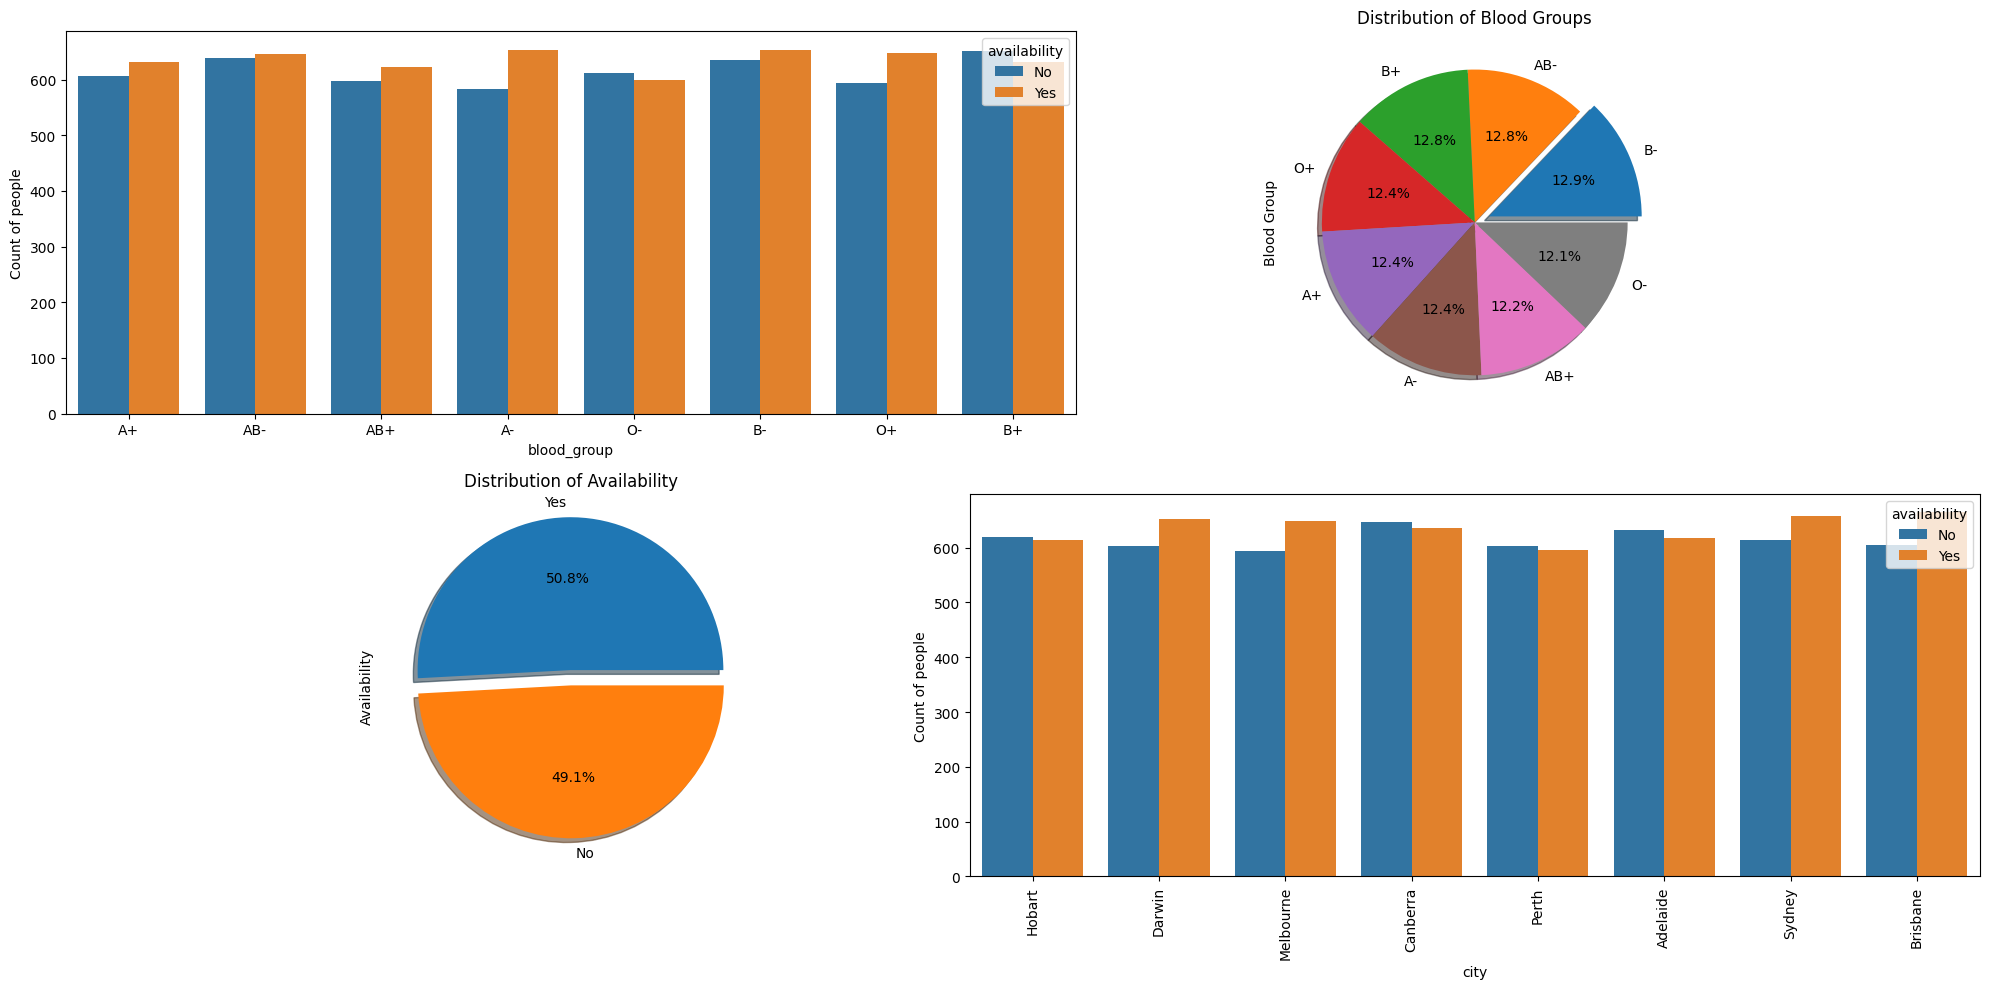

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(x='blood_group',hue='availability',data=data)
plt.ylabel('Count of people')

plt.subplot(2,2,2)
data['blood_group'].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True,explode=(0.1,0,0,0,0,0,0,0))
plt.ylabel('Blood Group')
plt.title('Distribution of Blood Groups')

plt.subplot(2,2,3)
data['availability'].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True,explode=(0.1,0))
plt.ylabel('Availability')
plt.title('Distribution of Availability')

plt.subplot(2,2,4)
sns.countplot(x='city',hue='availability',data=data)
plt.ylabel('Count of people')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()



<Axes: xlabel='blood_group'>

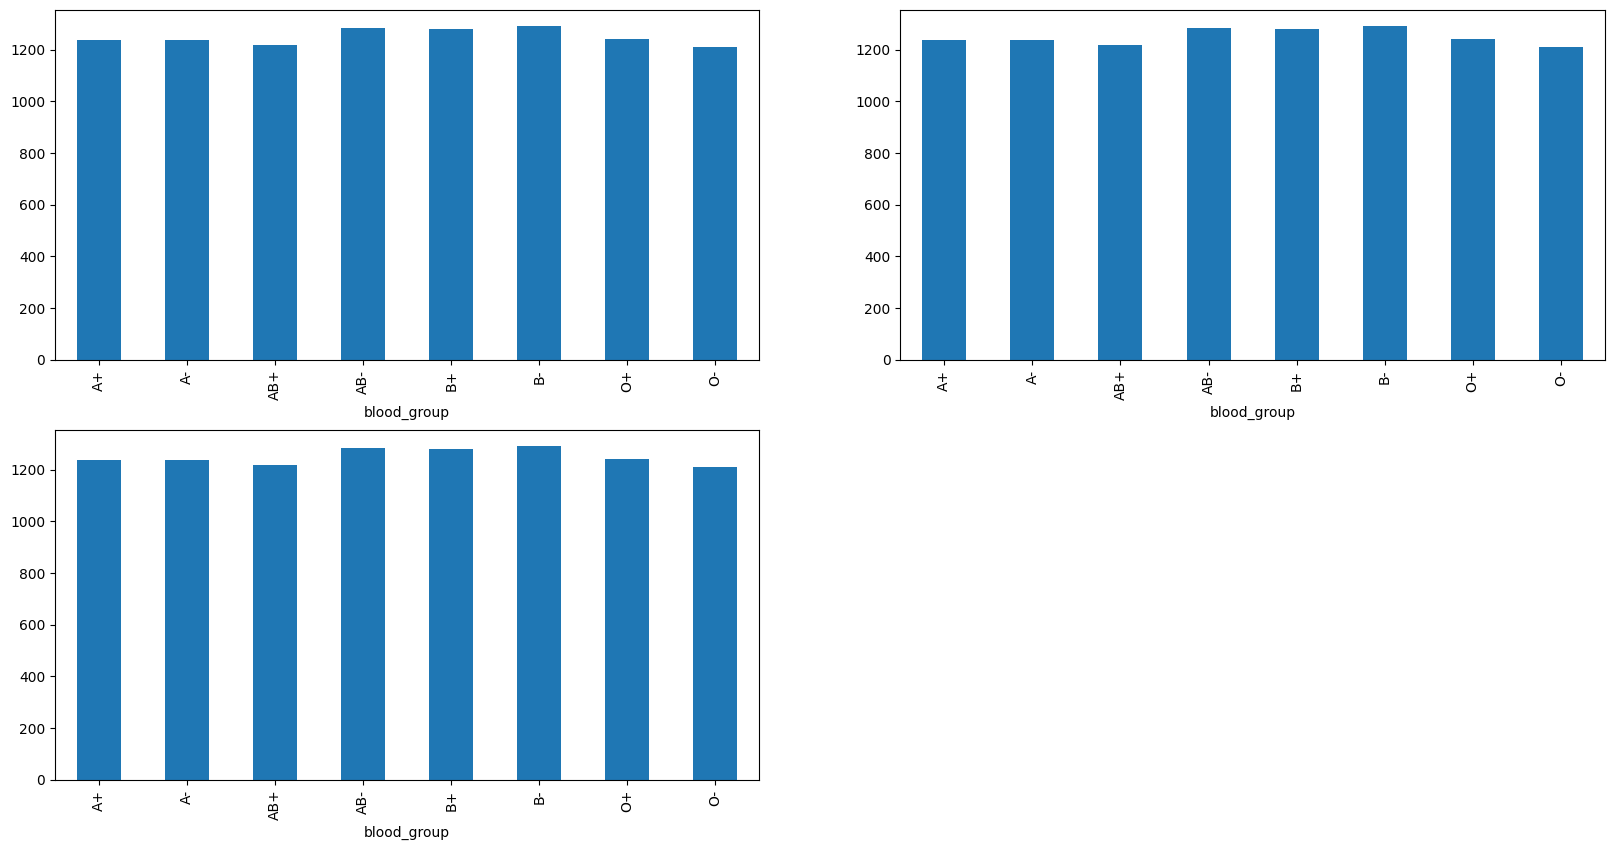

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
data.groupby('blood_group')['months_since_first_donation'].count().plot(kind='bar')
plt.subplot(2,2,2)
data.groupby('blood_group')['number_of_donation'].count().plot(kind='bar')
plt.subplot(2,2,3)
data.groupby('blood_group')['pints_donated'].count().plot(kind='bar')

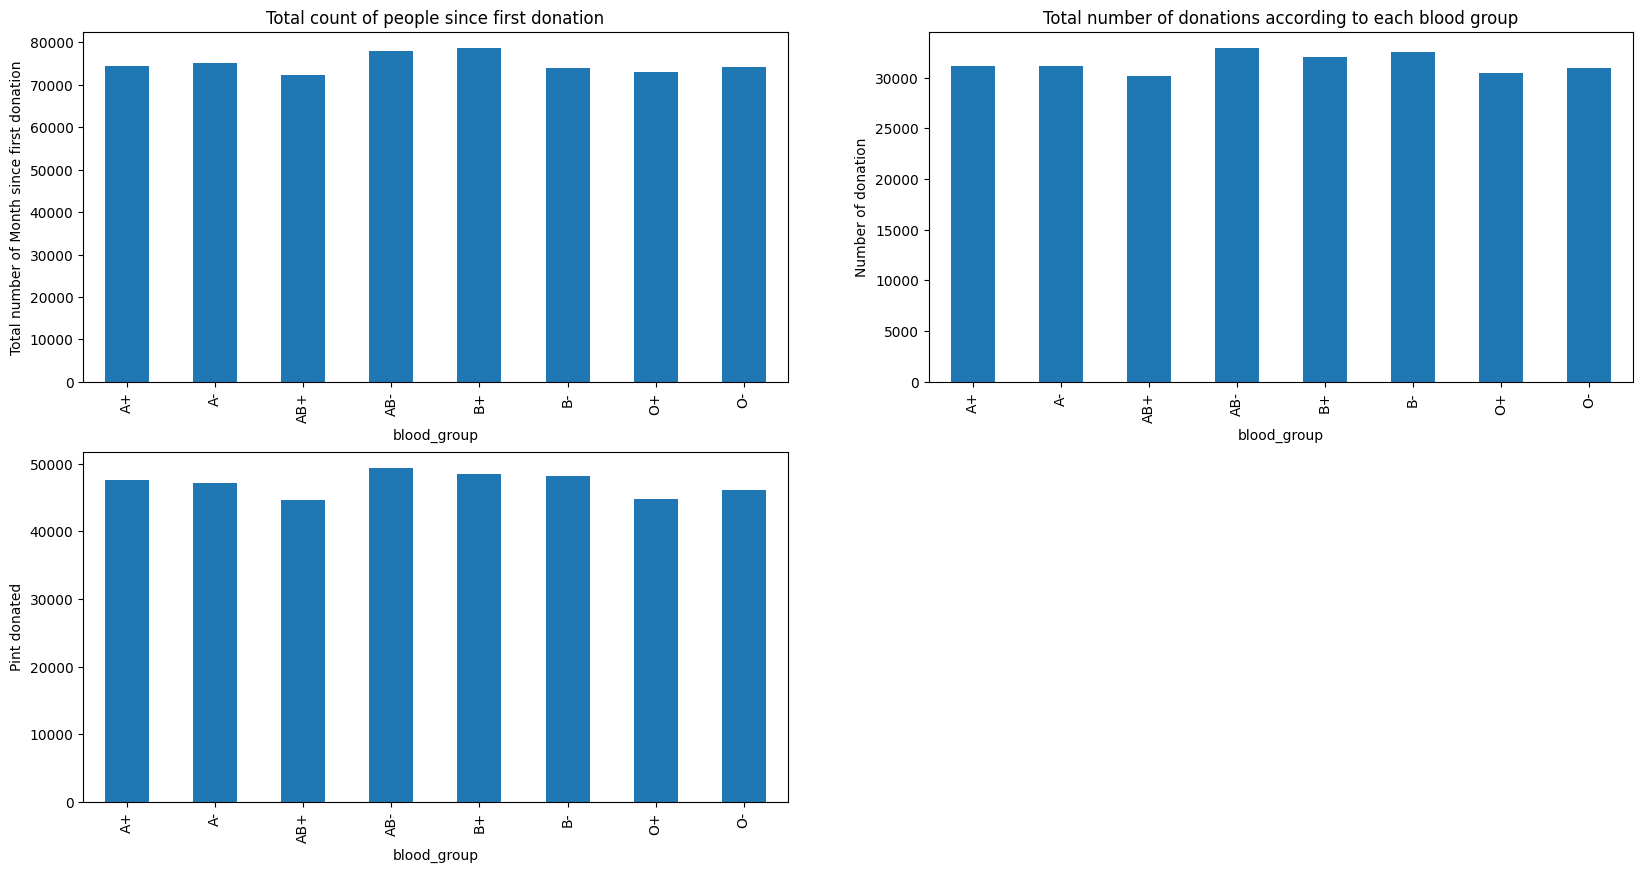

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
data.groupby('blood_group')['months_since_first_donation'].sum().plot(kind='bar')
plt.ylabel('Total number of Month since first donation')
plt.title('Total count of people since first donation')

plt.subplot(2,2,2)
data.groupby('blood_group')['number_of_donation'].sum().plot(kind='bar')
plt.ylabel('Number of donation')
plt.title('Total number of donations according to each blood group')

plt.subplot(2,2,3)
data.groupby('blood_group')['pints_donated'].sum().plot(kind='bar')
plt.ylabel('Pint donated')

plt.show()

<Axes: xlabel='city'>

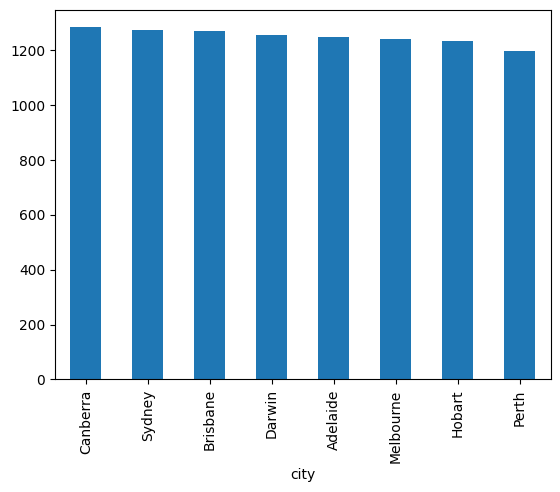

In [8]:
data.city.value_counts().plot(kind='bar')

<Axes: xlabel='blood_group'>

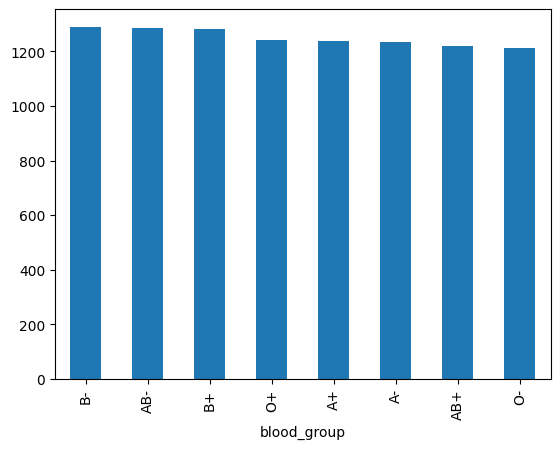

In [9]:
data.blood_group.value_counts().plot(kind='bar')

In [10]:
data.head()

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


In [11]:
new = data.drop(columns=['donor_id','name','email','password','contact_number','created_at'])

In [12]:
new.head()

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,Hobart,A+,No,65,31,62
1,Darwin,AB-,Yes,64,8,16
2,Melbourne,AB+,Yes,39,6,6
3,Darwin,A-,No,55,20,20
4,Darwin,O-,No,7,35,35


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(new.drop(columns=['availability']), new['availability'], test_size=0.2,random_state=42)

In [22]:
categorical_features = ['city','blood_group']
numerical_features = ['months_since_first_donation', 'number_of_donation', 'pints_donated']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_features),
        ('passthrough','passthrough',numerical_features)
    ],remainder='drop'
)

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [23]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [25]:
# Encoding target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [26]:
params = {
    'n_estimators':[100,200,300],
    'max_depth':[10,20,30],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['log2','sqrt'],
    'criterion':['gini','entropy']
}

rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

rf.fit(X_train_transformed,y_train_encoded)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, ...], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [28]:
print(f"Classification Report for Random Forest\n\n {classification_report(y_test_encoded, rf.best_estimator_.predict(X_test_transformed))}")

Classification Report for Random Forest

               precision    recall  f1-score   support

           0       0.49      0.43      0.46       992
           1       0.50      0.56      0.53      1008

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



In [29]:
log_reg = LogisticRegression(
    penalty='l2',        
    C=1.0,               
    solver='lbfgs',      
    max_iter=100,        
    fit_intercept=True,  
    class_weight=None,   
    l1_ratio=None,       
    random_state=42      
)

log_reg.fit(X_train_transformed, y_train_encoded)
print(f"Classification Report for Logitic Regression\n\n {classification_report(y_test_encoded, log_reg.predict(X_test_transformed))}")

Classification Report for Logitic Regression

               precision    recall  f1-score   support

           0       0.51      0.35      0.42       992
           1       0.51      0.66      0.57      1008

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



In [30]:
from sklearn.svm import SVC

# Example with common hyperparameters
svm_clf = SVC(
    C=1.0,                # Regularization strength (smaller = stronger regularization)
    kernel='rbf',         # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
    degree=3,             # Degree for 'poly' kernel
    gamma='scale',        # Kernel coefficient ('scale', 'auto', or float)
    coef0=0.0,            # Independent term in 'poly' and 'sigmoid' kernels
    shrinking=True,       # Whether to use shrinking heuristic
    probability=False,    # Enable probability estimates (slower)
    tol=1e-3,             # Tolerance for stopping criterion
    cache_size=200,       # Memory size for kernel cache (MB)
    class_weight=None,    # Handle imbalance: 'balanced' or dict
    max_iter=-1,          # Max iterations (-1 = no limit)
    random_state=42       # For reproducibility (only affects probability outputs)
)
svm_clf.fit(X_train_transformed, y_train_encoded)
print(f"Classification Report for SVC\n\n {classification_report(y_test_encoded, svm_clf.predict(X_test_transformed))}")


Classification Report for SVC

               precision    recall  f1-score   support

           0       0.40      0.03      0.06       992
           1       0.50      0.95      0.65      1008

    accuracy                           0.50      2000
   macro avg       0.45      0.49      0.36      2000
weighted avg       0.45      0.50      0.36      2000

